In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
d1 = pd.read_csv('https://raw.githubusercontent.com/dayanandv/Data-Science/main/dataset/uk-500.csv')
d1.head()

# Populations and Samples

## Sampling techniques

### Simple Random Sampling

df.sample(n, frac, replace, random_state)

In [ ]:
d1.sample(n=3)

In [ ]:
d1.sample(n=3, random_state=42)

In [ ]:
d1.sample(frac=0.10, replace=True, random_state=5)

In [ ]:
d1.shape

(500, 11)

### Stratified Sampling

In [2]:
d2 = pd.read_csv('https://raw.githubusercontent.com/dayanandv/Data-Science/main/dataset/StudentsPerformance.csv')
d2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


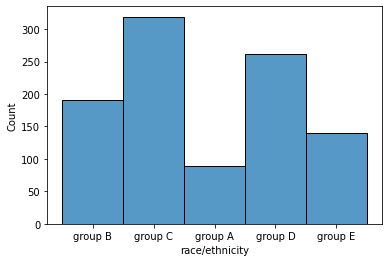

In [ ]:
sns.histplot(d2['race/ethnicity'])

In [ ]:
d2.groupby('race/ethnicity', group_keys=False).apply(lambda x:x.sample(min(len(x),3)))

### Systematic Sampling

In [ ]:
step_size = 6
d2.iloc[::step_size]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
6,female,group B,some college,standard,completed,88,95,92
12,female,group B,high school,standard,none,65,81,73
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
972,female,group A,high school,free/reduced,completed,53,50,60
978,male,group D,high school,standard,completed,55,41,48
984,female,group C,some high school,standard,none,74,75,82
990,male,group E,high school,free/reduced,completed,86,81,75


In [ ]:
indices = np.arange(random.randint(1,30), len(d2), step=step_size)
d2.iloc[indices]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
9,female,group B,high school,free/reduced,none,38,60,50
15,female,group C,some high school,standard,none,69,75,78
21,female,group B,some college,free/reduced,completed,65,75,70
27,female,group C,bachelor's degree,standard,none,67,69,75
...,...,...,...,...,...,...,...,...
975,female,group C,some college,standard,completed,64,82,77
981,male,group D,some high school,standard,none,81,78,78
987,male,group E,some high school,standard,completed,81,75,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


### Clustered Sampling

Read: [Reservoir Sampling](https://en.wikipedia.org/wiki/Reservoir_sampling)


---



## Handling imbalanced datasets

Undersampling

Oversampling

Read: [imblearn](https://github.com/scikit-learn-contrib/imbalanced-learn)



---



Sampling error: Differences between the sample and the population that exist only because of the observations that happened to be selected for the sample. Increasing sample size helps in reduction.

Non-sampling error: Errors in data acquisition, Nonresponse errors, Selection bias etc. Increasing sample size may not help in reduction.

[Reference](https://personal.utdallas.edu/~scniu/OPRE-6301/documents/Data_Collection_and_Sampling.pdf)

# Frequency Distribution

## Range

In [ ]:
reading_range = np.amax(d2['reading score'])-np.amin(d2['reading score'])
reading_range

83

## Number of classes

In [ ]:
num_of_classes = 6

## Class Interval

In [ ]:
class_interval = reading_range/num_of_classes
class_interval

13.833333333333334

## Class Midpoint

## Relative Frequency

In [ ]:
d2['reading score'].value_counts()

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

## Cumulative Frequency

In [ ]:
d2['reading score'].value_counts().cumsum()

72      34
74      67
64      99
73     129
67     159
      ... 
32     996
28     997
26     998
23     999
17    1000
Name: reading score, Length: 72, dtype: int64

# Measures of central tendency

## Mean

In [ ]:
d2.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

## Median

In [ ]:
d2['reading score'].median()

70.0

## Mode

In [ ]:
d2['reading score'].mode()

0    72
dtype: int64

## Percentile

In [ ]:
d2.quantile(.2, axis = 0)

math score       53.0
reading score    57.0
writing score    54.0
Name: 0.2, dtype: float64

In [ ]:
d2.quantile([.1, .3, .63, .95], axis = 0)

,math score,reading score,writing score
0.10,47.00,51.00,48.0
0.30,59.00,62.00,60.0
0.63,71.00,74.37,74.0
0.95,90.05,92.00,92.0


## Quartile

In [ ]:
d2.quantile([.25, .50, .75], axis = 0)

,math score,reading score,writing score
0.25,57.0,59.0,57.75
0.50,66.0,70.0,69.00
0.75,77.0,79.0,79.00


## Recap of pandas describe()

In [ ]:
d2.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


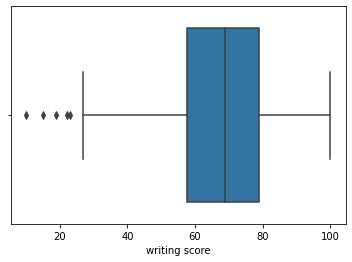

In [5]:
sns.boxplot(d2['writing score'])

# Measures of variance

In [7]:
d3 = pd.read_csv('https://raw.githubusercontent.com/dayanandv/Data-Science/main/dataset/nba.csv')
d3.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


## Skewness

In [ ]:
d3.skew()

Number    1.668386
Age       0.626349
Weight    0.113788
Salary    1.576321
dtype: float64

[]

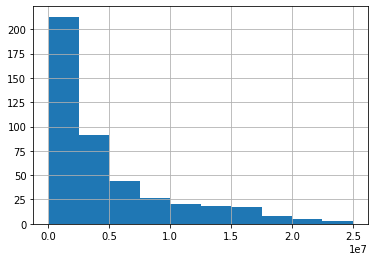

In [ ]:
d3['Salary'].sort_values().hist().plot(use_index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


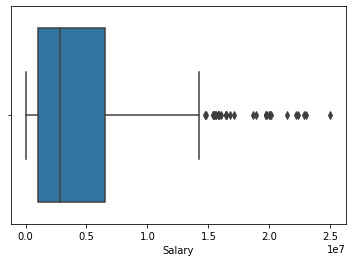

In [10]:
sns.boxplot(d3['Salary'])

## Kurtosis

In [ ]:
d3.kurt()

Number    4.364464
Age      -0.051119
Weight   -0.552546
Salary    1.839177
dtype: float64